In [4]:
from user_space_models import generate_user_space
from network_generation import calculate_similarity, generate_follower_network_exhaustive, generate_retweet_network
import numpy as np 

some_space = generate_user_space(n_users= 100,
                        n_cleavage= 3,
                        n_non_cleavage= 1,
                        n_noise= 1,
                        n_unifying_topics= 1,
                        unification_point= 0.4,
                        cleavage_alignment= 0.95,
                        non_cleavage_alignment= 0.9,
                        bimodal_polarization_strength= 2,
                        non_polarization_attraction=8,
                        clevage_alignment_noise= 0.1,
                        non_cleavage_alignment_noise=0.1,
                        unification_strength=100,
                        unification_alignment_noise=0.01,
                        unification_alignment=1,
                        noise_topic_noise= 0.8)




similarity_matrix = calculate_similarity(some_space, normalize= True)
out_deg_dist = np.random.uniform(low = 1, high= 5, size = some_space.shape[0])
in_deg_dist = np.random.uniform(low= 1, high= 5, size = some_space.shape[0])
network = generate_follower_network_exhaustive(out_deg_dist,in_deg_dist, homophily_level= 1000, user_similarity_matrix= similarity_matrix, generation_tolerance= 1e4)

Suggesting 0 ->> 29
Accepted 0 ->> 29
Suggesting 0 ->> 29
Rejected: Multiple 0 ->> 29
Suggesting 0 ->> 80
Accepted 0 ->> 80
Suggesting 0 ->> 80
Rejected: Multiple 0 ->> 80
Suggesting 0 ->> 57
Accepted 0 ->> 57
Suggesting 0 ->> 57
Rejected: Multiple 0 ->> 57
Suggesting 0 ->> 74
Accepted 0 ->> 74
Suggesting 1 ->> 38
Accepted 1 ->> 38
Suggesting 2 ->> 48
Accepted 2 ->> 48
Suggesting 2 ->> 48
Rejected: Multiple 2 ->> 48
Suggesting 2 ->> 97
Accepted 2 ->> 97
Suggesting 2 ->> 97
Rejected: Multiple 2 ->> 97
Suggesting 2 ->> 70
Accepted 2 ->> 70
Suggesting 3 ->> 51
Accepted 3 ->> 51
Suggesting 3 ->> 51
Rejected: Multiple 3 ->> 51
Suggesting 3 ->> 64
Accepted 3 ->> 64
Suggesting 4 ->> 40
Accepted 4 ->> 40
Suggesting 5 ->> 79
Accepted 5 ->> 79
Suggesting 5 ->> 79
Rejected: Multiple 5 ->> 79
Suggesting 5 ->> 12
Accepted 5 ->> 12
Suggesting 5 ->> 12
Rejected: Multiple 5 ->> 12
Suggesting 5 ->> 92
Accepted 5 ->> 92
Suggesting 5 ->> 92
Rejected: Multiple 5 ->> 92
Suggesting 5 ->> 77
Accepted 5 ->> 7

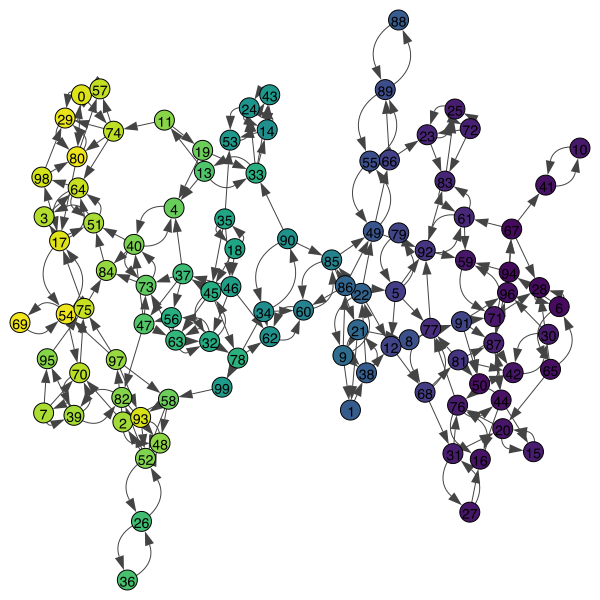

In [5]:

import igraph as ig
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
colormap = plt.cm.viridis
vertex_colors = [colormap((value +1) / 2) for value in some_space[:,1]]
vertex_colors_hex = [mcolors.to_hex(color) for color in vertex_colors]
network.vs['color'] = vertex_colors_hex
network.vs["label"] = [i for i in range(similarity_matrix.shape[0])]
layout = network.layout_kamada_kawai()
ig.plot(network, layout = layout)


In [10]:
rt = generate_retweet_network(network, number_of_retweets = [round(i) for i in np.random.uniform(low = 0, high = 2, size = similarity_matrix.shape[0])],
                                      echo_chamber_strength= 0.9, homophily_level= 10, single_retweet= False,
                                      user_space= some_space, topic= 5)

Retweeting: 100%|██████████| 100/100 [00:00<00:00, 6224.30it/s]

Retweet 0 ->> 29, Echo Chamber
Retweet 0 ->> 29, Feed Observation
Retweet 0 ->> 29, Echo Chamber
Retweet 0 ->> 29, Feed Observation
Retweet 3 ->> 17, Echo Chamber
Retweet 3 ->> 17, Feed Observation
Retweet 3 ->> 17, Echo Chamber
Retweet 3 ->> 17, Feed Observation
Retweet 4 ->> 37, Echo Chamber
Retweet 4 ->> 37, Feed Observation
Retweet 5 ->> 79, Echo Chamber
Retweet 5 ->> 79, Feed Observation
Retweet 6 ->> 65, Echo Chamber
Retweet 6 ->> 65, Feed Observation
Retweet 7 ->> 0, Feed Observation
Retweet 8 ->> 21, Echo Chamber
Retweet 8 ->> 21, Feed Observation
Retweet 9 ->> 21, Echo Chamber
Retweet 9 ->> 21, Feed Observation
Retweet 10 ->> 41, Echo Chamber
Retweet 10 ->> 41, Feed Observation
Retweet 10 ->> 75, Feed Observation
Retweet 11 ->> 13, Echo Chamber
Retweet 11 ->> 13, Feed Observation
Retweet 12 ->> 22, Echo Chamber
Retweet 12 ->> 22, Feed Observation
Retweet 13 ->> 19, Echo Chamber
Retweet 13 ->> 19, Feed Observation
Retweet 14 ->> 24, Echo Chamber
Retweet 14 ->> 24, Feed Observat

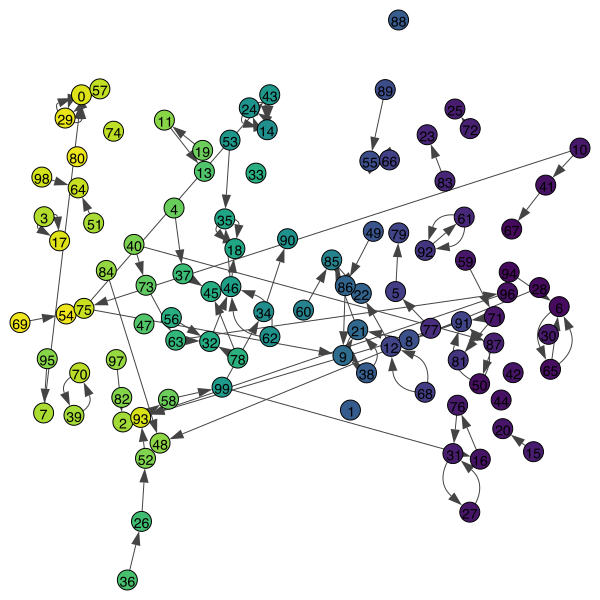

In [11]:

import igraph as ig
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
colormap = plt.cm.viridis
vertex_colors = [colormap((value +1) / 2) for value in some_space[:,1]]
vertex_colors_hex = [mcolors.to_hex(color) for color in vertex_colors]
rt.vs['color'] = vertex_colors_hex
rt.vs["label"] = [i for i in range(similarity_matrix.shape[0])]
ig.plot(rt, layout = layout)
